<a href="https://colab.research.google.com/github/1s5ac/STA365_HW/blob/main/HW2_BochongLiu_1005013316.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1:

We are given following expression:
$$
\propto \exp\left(-\frac{1}{2}(\tau + n\phi)\left(\theta - \frac{1}{\tau + n\phi}(\tau\theta_0 + \phi \sum_{i=1}^{n} x_i)\right)^2\right)
$$

Let's indicate:
$$
\mu = \frac{\tau\theta_0 + \phi \sum_{i=1}^{n} x_i}{\tau + n\phi}
$$

and then we can get:
$$
(\theta - \mu)^2 = \theta^2 - 2\theta\mu + \mu^2
$$

Substituting μ into the above equation:
$$\theta^2 - 2\theta \frac{\tau\theta_0 + \phi \sum_{i=1}^{n} x_i}{\tau + n\phi} + \left( \frac{\tau\theta_0 + \phi \sum_{i=1}^{n} x_i}{\tau + n\phi} \right)^2
$$

Multiplying the above equation by $-\frac{1}{2}(\tau + n\phi)$, and then we can get:

$$
-\frac{1}{2}(\tau + n\phi)\theta^2 + \left(\tau\theta_0 + \phi\sum_{i=1}^{n}x_i\right)\theta -\frac{1}{2}\left(\tau\theta_0 + \phi\sum_{i=1}^{n}x_i\right)^2\left(\frac{1}{\tau + n\phi}\right)
$$

$$
\exp\left(-\frac{1}{2}(\tau + n\phi)\theta^2 + \left(\tau\theta_0 + \phi\sum_{i=1}^{n}x_i\right)\theta -\frac{1}{2}\left(\tau\theta_0 + \phi\sum_{i=1}^{n}x_i\right)^2\left(\frac{1}{\tau + n\phi}\right)\right)
$$

This is quadratic form of $\theta$ becuase the format is a$\theta^2$ +
b$\theta$ + c. Since the coefficients of the quadratic terms are negative, what we will get the concave function.

# Part 2:

1.

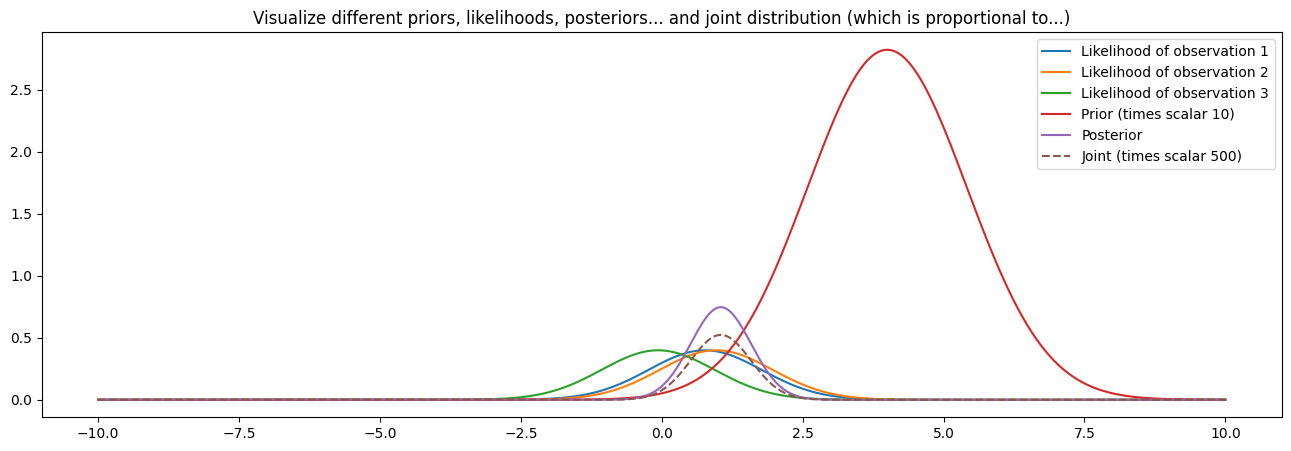

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given parameters for the Bayesian analysis
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Likelihood for each observation
likelihoods = [stats.norm.pdf(parameter_domain, loc=xi, scale=1) for xi in x]

# Prior distribution
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Joint distribution for the visualization
joint = 500 * np.prod(likelihoods, axis=0) * prior

# Posterior distribution
posterior = stats.norm(loc=(tau*theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n)**0.5).pdf(parameter_domain)

# Plotting
plt.figure(figsize=(16, 5))

# Plot individual likelihoods for each observation
for i, individual_likelihood in enumerate(likelihoods):
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {i+1}")

# Plot other distributions
plt.plot(parameter_domain, 10*prior, label="Prior (times scalar 10)")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar 500)")

# Adding legend and title
plt.legend()
plt.title("Visualize different priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")

# Show plot
plt.show()

In [ ]:
x

array([ 0.76870858,  0.96594577, -0.06502896])

2.

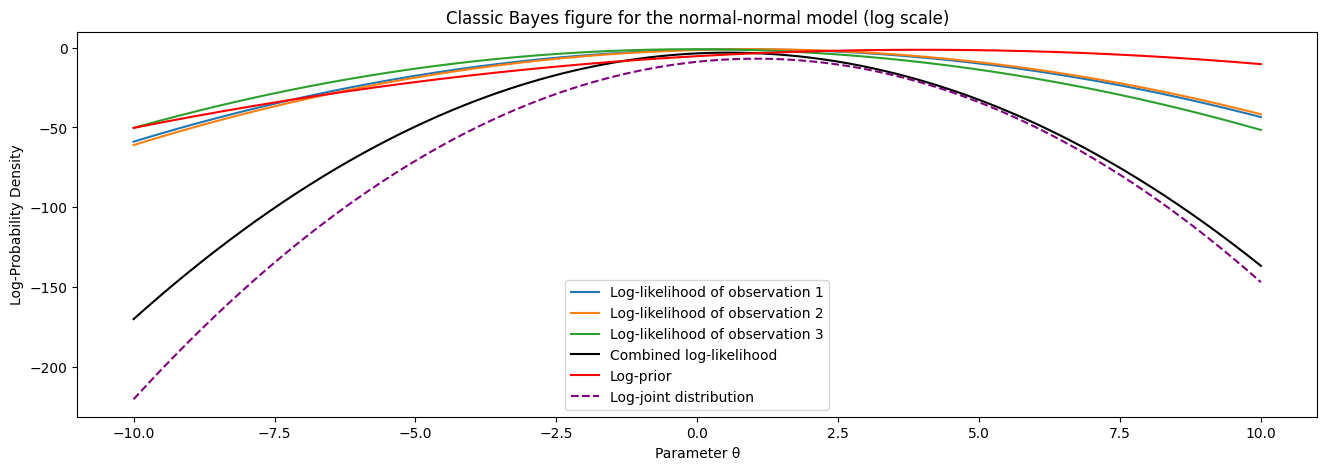

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters from the normal-normal model
n = 3
theta_0, tau = 4, 1/2
phi = 1

# Parameter domain for theta
parameter_domain = np.linspace(-10, 10, 1001)

# Log-likelihood for each observation
log_likelihoods = np.array([stats.norm.logpdf(xi, loc=parameter_domain, scale=1/phi**0.5) for xi in x])

# Summing log-likelihoods for all observations to get the combined log-likelihood
combined_log_likelihood = log_likelihoods.sum(axis=0)

# Log-prior distribution
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)

# Log of the joint distribution (log-likelihood + log-prior)
log_joint = combined_log_likelihood + log_prior

# Plotting
plt.figure(figsize=(16, 5))

# Plotting the log-likelihoods for each observation
for i, log_likelihood in enumerate(log_likelihoods):
    plt.plot(parameter_domain, log_likelihood, label=f"Log-likelihood of observation {i+1}")

# Plotting the combined log-likelihood, log-prior, and log-joint distributions
plt.plot(parameter_domain, combined_log_likelihood, label="Combined log-likelihood", color='black')
plt.plot(parameter_domain, log_prior, label="Log-prior", color='red')
plt.plot(parameter_domain, log_joint, label="Log-joint distribution", color='purple', linestyle='--')

# Adding legend and title
plt.legend()
plt.title("Classic Bayes figure for the normal-normal model (log scale)")
plt.xlabel("Parameter θ")
plt.ylabel("Log-Probability Density")

# Show plot without log scale due to negative log probabilities
plt.show()

3.

The normal likelihood is given by:
$$
p(x \mid \theta, \phi)=\prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}
$$

With a uniform prior $p(\theta) \propto 1$, the posterior distribution $p(\theta \mid x)$ is proportional to the likelihood function:
$$
p(\theta \mid x) \propto \prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}
$$

Combining the exponents and eliminating the constant factors (which will cancel out after normalizing) can further simplify this:
$$
p(\theta \mid x) \propto e^{-\frac{\phi}{2} \sum_{i=1}^n\left(x_i-\theta\right)^2}
$$

Square sums make up the sum inside the exponent, which is expressed as:
$$
\sum_{i=1}^n\left(x_i-\theta\right)^2=n \bar{x}^2-2 n \bar{x} \theta+n \theta^2
$$

This may be expressed as the exponent of a normal distribution by using full squares where $\bar{x}$ is the sample mean of the data $x$.:
$$
-\frac{\phi}{2}\left[n \theta^2-2 n \bar{x} \theta+n \bar{x}^2\right]=-\frac{\phi}{2}\left[n\left(\theta^2-2 \bar{x} \theta+\bar{x}^2\right)\right]=-\frac{\phi}{2} n(\theta-\bar{x})^2
$$

This gives us the posterior distribution:
$$
\theta \mid x \sim \mathcal{N}\left(\bar{x}, \sigma^2 / n\right)
$$

In this case, the sample mean $\bar{x}$ represents the posterior mean, the sample variance divided by the number of observations is the posterior variance $\sigma^2 / n$, and the variance linked to the likelihood function (assuming $\phi = \frac{1}{\sigma^2}$) is represented by $\sigma^2$.

4.

Log likelihoods remain consistent irrespective of the chosen prior, including improper ones, since they are solely determined by the data and the parameters of the model. On the other hand, using the incorrect prior would prohibit the posterior distributions, which are produced by combining the likelihood and the prior, from correctly portraying a valid probability distribution as they could never add up to one. However, a strong enough likelihood can compensate for the improper prior, resulting in a proper posterior. The marginal likelihood constants are pivotal when ensuring the posterior is properly normalized to one, especially when working with an improper prior. The adequacy of the likelihood to produce an integrable product with the prior, which the marginal likelihood can then normalize, is critical. If the likelihood lacks informativeness, the product may not be integrable, and no amount of adjustment by the marginal likelihood constant will render the posterior proper. Essentially, employing improper priors necessitates a meticulous examination of the marginal likelihood to confirm that the derived posterior qualifies as a valid probability distribution, while the log likelihood is unaffected by the choice of prior.
